A recurrent neural network deals with sequence problems because
their connections form a directed cycle. RNN is widely used for time
series forecasting because of these characteristics. Many state of
the art results have been achieved using RNN/GRU/LSTM.
In this problem, we will try to predict the stock prices of IBM by
using a multi-layer RNN/GRU model.

## Importing Libraries

In [34]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,SimpleRNN
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

## Importing Dataset

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
!ls -ltr "/content/drive/My Drive/Dataset/Seq_Learn_Assign_2"

total 150
-rw------- 1 root root 153466 Dec 29 01:37 IBM_2006-01-01_to_2018-01-01.csv


In [37]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Seq_Learn_Assign_2/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
data.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


## Splitting the data into tranining and test set

In [38]:
training_set = data[:'2016'].iloc[:,1:2].values
test_set = data['2017':].iloc[:,1:2].values
training_set

array([[ 82.55],
       [ 82.5 ],
       [ 82.9 ],
       ...,
       [167.74],
       [166.99],
       [166.7 ]])

In [39]:
training_set.shape

(2769, 1)

In [40]:
test_set.shape

(251, 1)

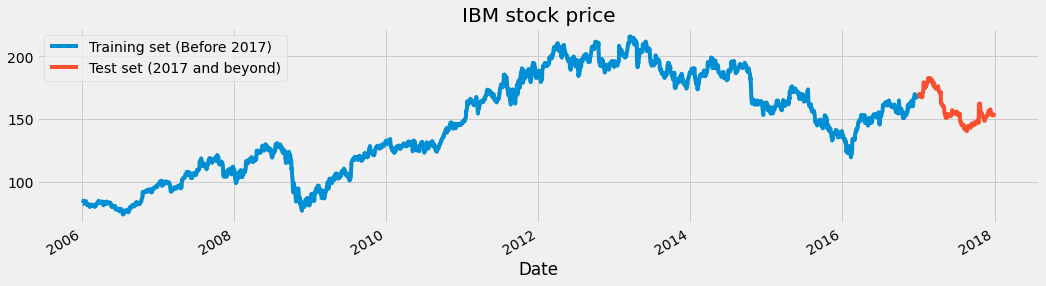

In [41]:
data["High"][:'2016'].plot(figsize=(16,4),legend=True)
data["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

### Scaling the data set

In [42]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [43]:
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [44]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2709, 60, 1)

In [45]:
y_train.shape

(2709,)

## Model Building and training

In [46]:
model = Sequential()
model.add(SimpleRNN(50, activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(50, activation="tanh" ,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(GRU(50, activation="tanh",  input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 60, 50)            2600      
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_13 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_6 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_14 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_7 (GRU)                 (None, 50)               

In [47]:
model.fit(X_train,y_train,epochs=20,batch_size=32,validation_split=0.33)

Epoch 1/20
57/57 [==============================] - 11s 101ms/step - loss: 0.0447 - accuracy: 0.0011 - val_loss: 0.0275 - val_accuracy: 0.0000e+00
Epoch 2/20
57/57 [==============================] - 5s 81ms/step - loss: 0.0142 - accuracy: 0.0011 - val_loss: 0.0335 - val_accuracy: 0.0000e+00
Epoch 3/20
57/57 [==============================] - 5s 80ms/step - loss: 0.0098 - accuracy: 0.0011 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 4/20
57/57 [==============================] - 5s 82ms/step - loss: 0.0078 - accuracy: 0.0011 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 5/20
57/57 [==============================] - 5s 81ms/step - loss: 0.0072 - accuracy: 0.0011 - val_loss: 0.0164 - val_accuracy: 0.0000e+00
Epoch 6/20
57/57 [==============================] - 5s 83ms/step - loss: 0.0070 - accuracy: 0.0011 - val_loss: 0.0027 - val_accuracy: 0.0000e+00
Epoch 7/20
57/57 [==============================] - 5s 82ms/step - loss: 0.0053 - accuracy: 0.0011 - val_loss: 0.0077 - val_accu

## Predicting with Model

In [48]:
dataset_total = pd.concat((data["High"][:'2016'],data["High"]['2017':]),axis=0)
print(dataset_total.shape)

inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
print(inputs[0])
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs  = sc.transform(inputs)
inputs.shape

(3020,)
157.43
(311,)
(311, 1)


(311, 1)

In [49]:
inputs[0]

array([0.58812342])

In [50]:
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print(X_test.shape)
GRU_predicted_stock_price = model.predict(X_test)
print(GRU_predicted_stock_price.shape)

GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)


(251, 60)
(251, 60, 1)
(251, 1)


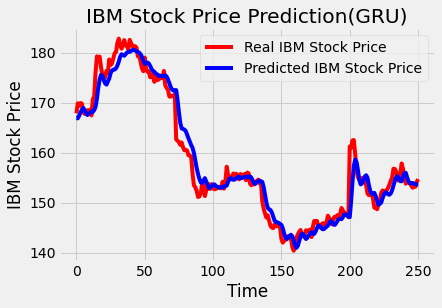

In [51]:
plt.plot(test_set, color='red',label='Real IBM Stock Price')
plt.plot(GRU_predicted_stock_price, color='blue',label='Predicted IBM Stock Price')
plt.title('IBM Stock Price Prediction(GRU)')
plt.xlabel('Time')
plt.ylabel('IBM Stock Price')
plt.legend()
plt.show()

In [52]:
rmse = math.sqrt(mean_squared_error(test_set, GRU_predicted_stock_price))
print(f"The root mean squared error is {round(rmse,2)}")

The root mean squared error is 2.55
